In [2]:
import pandas as pd
import numpy as np
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.word2vec import LineSentence
import gensim
import os
import re

In [3]:
df = pd.read_csv('./more_tweets_plus.csv')

In [4]:
df.head()

,date,retweets,favorites,text,mentions,hashtags,id,permalink,tweet_clean,polarity,subjectivity,sig,log_rt,log_faves
0,2018-08-01 19:52:00,0,0,Good Evening. We are working to address these ...,NaN,NaN,1.024805e+18,https://twitter.com/NYCTSubway/status/10248050...,good evening. we are working to address these ...,0.7,0.600,^JZ,0.0,0.0
1,2018-08-01 19:49:00,0,0,Good Evening. Can you tell us your location an...,NaN,NaN,1.024804e+18,https://twitter.com/NYCTSubway/status/10248044...,good evening. can you tell us your location an...,0.7,0.600,^JZ,0.0,0.0
2,2018-08-01 19:39:00,0,0,Thank you for reporting this information. We w...,NaN,NaN,1.024802e+18,https://twitter.com/NYCTSubway/status/10248017...,thank you for reporting this information. we w...,0.0,0.000,^JZ,0.0,0.0
3,2018-08-01 19:38:00,0,0,You're very welcome and I hope you have a grea...,NaN,NaN,1.024802e+18,https://twitter.com/NYCTSubway/status/10248015...,you're very welcome and i hope you have a grea...,0.9,0.875,^JZ,0.0,0.0
4,2018-08-01 19:36:00,0,0,Thank you again for reporting this. We will at...,NaN,NaN,1.024801e+18,https://twitter.com/NYCTSubway/status/10248010...,thank you again for reporting this. we will at...,0.8,0.750,^JZ,0.0,0.0


In [118]:
# df['text'] = [re.sub(r'^@\S+', '', doc) for doc in df.text]

In [119]:
# df['text'] = [re.sub(r'\^\S+', '', doc) for doc in df.text]

In [120]:
# df['text'] = [re.sub(r'https:\S+', '', doc) for doc in df.text]

In [121]:
# df['text'] = [doc.lower() for doc in df.text]

In [5]:
def cleany(tweet):
    if '@' in tweet:
        tweet = re.sub('@\S+ ','', tweet)
    tweet = re.sub('\^\S+','', tweet)
    tweet = re.sub('https:\S+','', tweet)
    return tweet.lower()

In [6]:
df['cleaned_text'] = [cleany(doc) for doc in df.text]

In [7]:
def cleany_ats(tweet):
    tweet = re.sub('\^\S+','', tweet)
    tweet = re.sub('https:\S+','', tweet)
    return tweet.lower()

In [8]:
df['with_ats'] = [cleany_ats(doc) for doc in df.text]

In [9]:
df.head()

,date,retweets,favorites,text,mentions,hashtags,id,permalink,tweet_clean,polarity,subjectivity,sig,log_rt,log_faves,cleaned_text,with_ats
0,2018-08-01 19:52:00,0,0,Good Evening. We are working to address these ...,NaN,NaN,1.024805e+18,https://twitter.com/NYCTSubway/status/10248050...,good evening. we are working to address these ...,0.7,0.600,^JZ,0.0,0.0,good evening. we are working to address these ...,good evening. we are working to address these ...
1,2018-08-01 19:49:00,0,0,Good Evening. Can you tell us your location an...,NaN,NaN,1.024804e+18,https://twitter.com/NYCTSubway/status/10248044...,good evening. can you tell us your location an...,0.7,0.600,^JZ,0.0,0.0,good evening. can you tell us your location an...,good evening. can you tell us your location an...
2,2018-08-01 19:39:00,0,0,Thank you for reporting this information. We w...,NaN,NaN,1.024802e+18,https://twitter.com/NYCTSubway/status/10248017...,thank you for reporting this information. we w...,0.0,0.000,^JZ,0.0,0.0,thank you for reporting this information. we w...,thank you for reporting this information. we w...
3,2018-08-01 19:38:00,0,0,You're very welcome and I hope you have a grea...,NaN,NaN,1.024802e+18,https://twitter.com/NYCTSubway/status/10248015...,you're very welcome and i hope you have a grea...,0.9,0.875,^JZ,0.0,0.0,you're very welcome and i hope you have a grea...,you're very welcome and i hope you have a grea...
4,2018-08-01 19:36:00,0,0,Thank you again for reporting this. We will at...,NaN,NaN,1.024801e+18,https://twitter.com/NYCTSubway/status/10248010...,thank you again for reporting this. we will at...,0.8,0.750,^JZ,0.0,0.0,thank you again for reporting this. we will at...,thank you again for reporting this. we will at...


In [25]:
from nltk import WordNetLemmatizer, RegexpTokenizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

stops = list(ENGLISH_STOP_WORDS)
train_words = ['train', 'trains', 'st', 'av', 'http', 'a', 'b','c','d','e','f','g','j','l','m','n',
               'q','r','s','w','z','1','2','3','4','5','6','7']
stops = stops+train_words

In [26]:
def text_process(text):
    if pd.isnull(text):
        return []
    # tokenizing and removing punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    text_processed=tokenizer.tokenize(text)
    
    # removing any stopwords
    text_processed = [word.lower() for word in text_processed if word.lower() not in stops]
    
    # lemmatizing
    text_processed = [lemmatizer.lemmatize(word) for word in text_processed]

    return text_processed

In [27]:
docs = [text_process(doc) for doc in df.with_ats]

In [28]:
from gensim import corpora, models
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [31]:
dictionary = corpora.Dictionary(docs)

corpus = [dictionary.doc2bow(doc) for doc in docs]

ldamodel = models.ldamodel.LdaModel(corpus,                     # pass in our corpus
                                    id2word = dictionary,       # matches each word to its "number" or "spot" in the dictionary
                                    num_topics = 2,             # number of topics T to find
                                    passes = 5,                 # number of passes through corpus; similar to number of epochs
                                    minimum_probability = 0.01) # only include topics above this probability threshold

In [32]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
0      51.479786        1       1  0.287759  0.0
1      48.520218        1       2 -0.287759  0.0, topic_info=      Category          Freq           Term         Total  loglift  logprob
term                                                                       
43     Default  41759.000000          delay  41759.000000  30.0000  30.0000
70     Default  40953.000000        service  40953.000000  29.0000  29.0000
5125   Default  36484.000000         regret  36484.000000  28.0000  28.0000
15343  Default  35348.000000   servicealert  35348.000000  27.0000  27.0000
17     Default  19626.000000    supervision  19626.000000  26.0000  26.0000
125    Default  19307.000000           info  19307.000000  25.0000  25.0000
126    Default  18696.000000            mta  18696.000000  24.0000  24.0000
6      Default  22972.000000           time  22972.000000  23.0000  23.0000
68     Default  19445.000000       incident  19445.000000  22.0000  22.0000
134    Default  19386.000000        resumed  19386.000000  21.0000  21.0000
156    Default  18321.000000        problem  18321.000000  20.0000  20.0000
66     Default  17904.000000        earlier  17904.000000  19.0000  19.0000
198    Default  17208.000000        running  17208.000000  18.0000  18.0000
1145   Default  14450.000000          allow  14450.000000  17.0000  17.0000
8784   Default  12656.000000            ref  12656.000000  16.0000  16.0000
9      Default  15790.000000      direction  15790.000000  15.0000  15.0000
0      Default  14398.000000     additional  14398.000000  14.0000  14.0000
18     Default  10313.000000          thank  10313.000000  13.0000  13.0000
132    Default  13519.000000      following  13519.000000  12.0000  12.0000
39     Default   8887.000000         report   8887.000000  11.0000  11.0000
372    Default   8654.000000            com   8654.000000  10.0000  10.0000
385    Default   8985.000000         signal   8985.000000   9.0000   9.0000
296    Default   7815.000000             ly   7815.000000   8.0000   8.0000
292    Default   7814.000000            bit   7814.000000   7.0000   7.0000
381    Default   6949.000000        twitter   6949.000000   6.0000   6.0000
12     Default   6849.000000           tell   6849.000000   5.0000   5.0000
30     Default  11948.000000      condition  11948.000000   4.0000   4.0000
705    Default   6388.000000         matter   6388.000000   3.0000   3.0000
60     Default   6517.000000          track   6517.000000   2.0000   2.0000
78     Default   6712.000000  inconvenience   6712.000000   1.0000   1.0000
...        ...           ...            ...           ...      ...      ...
378     Topic2   5771.838379            pic   5772.355469   0.7231  -4.7353
129     Topic2   5127.911621         subway   5128.376953   0.7231  -4.8536
86      Topic2   4944.863770         notify   4945.314941   0.7231  -4.8900
192     Topic2   4890.847656       notified   4891.299805   0.7231  -4.9009
13      Topic2   5077.074707      traveling   5077.545410   0.7231  -4.8636
29      Topic2   4646.962402          aware   4647.414062   0.7231  -4.9521
579     Topic2   5290.610352        waiting   5291.141602   0.7231  -4.8224
244     Topic2   4340.982910         thanks   4341.437012   0.7231  -5.0202
428     Topic2   4856.824707         detail   4857.336914   0.7231  -4.9079
565     Topic2   4312.508301           note   4312.963379   0.7231  -5.0268
24      Topic2   4212.521484            car   4212.981445   0.7231  -5.0503
230     Topic2   4086.695068         review   4087.144531   0.7231  -5.0806
130     Topic2   3899.217529            www   3899.690918   0.7231  -5.1275
117     Topic2   3669.518311        forward   3669.969727   0.7231  -5.1883
96      Topic2   3549.999512        provide   3550.459229   0.7231  -5.2214
682     Topic2   3423.619141      attention   3424.072266   0.7231  -5.2576
733     Topic2   3389.960693       br

In [33]:
for i in ldamodel.print_topics(num_topics=3, num_words=5):
    print(i)

(0, '0.060*"delay" + 0.059*"service" + 0.051*"servicealert" + 0.032*"time" + 0.028*"incident"')
(1, '0.055*"regret" + 0.030*"supervision" + 0.029*"info" + 0.028*"mta" + 0.023*"direction"')


**Predict Author**

In [34]:
def find_sig(tw):
    if re.search('\^\S{1,4}', tw) != None:
        return re.search('\^\S{1,4}', tw)[0]
    else:
        return None

<input>:2: DeprecationWarning: invalid escape sequence \^
<input>:3: DeprecationWarning: invalid escape sequence \^
<input>:2: DeprecationWarning: invalid escape sequence \^
<input>:3: DeprecationWarning: invalid escape sequence \^
<input>:2: DeprecationWarning: invalid escape sequence \^
<input>:3: DeprecationWarning: invalid escape sequence \^
<ipython-input-34-7dede3188477>:2: DeprecationWarning: invalid escape sequence \^
  if re.search('\^\S{1,4}', tw) != None:
<ipython-input-34-7dede3188477>:3: DeprecationWarning: invalid escape sequence \^
  return re.search('\^\S{1,4}', tw)[0]


In [35]:
df.sig = df.text.map(find_sig)

In [36]:
len(df.sig.unique())

142

In [37]:
v = df.sig.value_counts()[df.sig.value_counts() < 22].index.values

df['sig'] = df.sig.map(lambda x: None if x in v else x)

In [38]:
df.sig.value_counts()

^JG      15382
^JP      13759
^BD      11378
^KF       6627
^DG       5206
^GES      4779
^JZ       4714
^HKD      4527
^RT       4442
^EE       3693
^JH       3531
^SL       3375
^JV       3027
^TCB      3008
^DM       2334
^JL       1982
^CB       1973
^MB       1961
^TB       1446
^DP       1235
^AM        997
^IR        905
^JF        622
^TBJ       579
^G.S.      516
^GS        443
^NOC       355
^MW        207
^KFht      194
^BDht      133
^DJP       128
^ML         93
^PI         91
^ABht       41
^G.S        24
Name: sig, dtype: int64

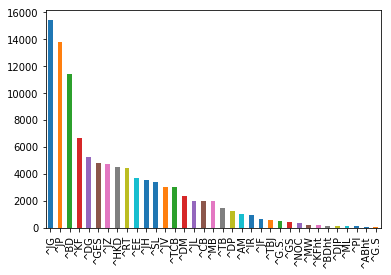

In [41]:
df.sig.value_counts().plot(kind='bar');

In [42]:
3689/len(df.sig)

0.02474327759556244

In [51]:
# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib
import matplotlib.pyplot as plt

In [45]:
authors = df.dropna()

In [46]:
authors.sig.isna().sum()

0

In [78]:
X = authors.with_ats
y = authors.sig

In [79]:
cv = CountVectorizer()

X = cv.fit_transform(X)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

In [81]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [82]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
lr.score(X_test, y_test)

0.86363636363636365

In [84]:
from wordcloud import WordCloud

In [100]:
df[df['sig']=='^JG']

,date,retweets,favorites,text,mentions,hashtags,id,permalink,tweet_clean,polarity,subjectivity,sig,log_rt,log_faves,cleaned_text,with_ats
677,2018-07-31 05:38:00,0,0,Hello Armando. We apologize as this is not com...,NaN,NaN,1.024228e+18,https://twitter.com/NYCTSubway/status/10242278...,hello armando. we apologize as this is not com...,0.183333,0.466667,^JG,0.000000,0.000000,hello armando. we apologize as this is not com...,hello armando. we apologize as this is not com...
681,2018-07-31 04:53:00,0,0,Good morning. Can you tell us where did this o...,NaN,NaN,1.024217e+18,https://twitter.com/NYCTSubway/status/10242165...,good morning. can you tell us where did this o...,0.700000,0.600000,^JG,0.000000,0.000000,good morning. can you tell us where did this o...,good morning. can you tell us where did this o...
682,2018-07-31 04:46:00,0,0,You're welcome and enjoy your day. ^JG,NaN,NaN,1.024215e+18,https://twitter.com/NYCTSubway/status/10242146...,you're welcome and enjoy your day.,0.600000,0.700000,^JG,0.000000,0.000000,you're welcome and enjoy your day.,you're welcome and enjoy your day.
688,2018-07-31 02:53:00,3,3,That means we are in the second half of the ye...,NaN,NaN,1.024186e+18,https://twitter.com/NYCTSubway/status/10241861...,that means we are in the second half of the ye...,-0.083333,0.083333,^JG,1.098612,1.098612,that means we are in the second half of the ye...,that means we are in the second half of the ye...
689,2018-07-31 02:47:00,3,3,"Hi, Alvis. Yes, today is July 31, the last day...",NaN,NaN,1.024185e+18,https://twitter.com/NYCTSubway/status/10241846...,"hi, alvis. yes, today is july 31, the last day...",0.000000,0.066667,^JG,1.098612,1.098612,"hi, alvis. yes, today is july 31, the last day...","hi, alvis. yes, today is july 31, the last day..."
692,2018-07-31 02:30:00,0,0,"Unfortunately, during late nights trains run l...",NaN,NaN,1.024180e+18,https://twitter.com/NYCTSubway/status/10241804...,"unfortunately, during late nights trains run l...",-0.266667,0.533333,^JG,0.000000,0.000000,"unfortunately, during late nights trains run l...","unfortunately, during late nights trains run l..."
693,2018-07-31 02:29:00,0,0,We are sorry that this has taken longer than u...,NaN,NaN,1.024180e+18,https://twitter.com/NYCTSubway/status/10241802...,we are sorry that this has taken longer than u...,-0.120000,0.680000,^JG,0.000000,0.000000,we are sorry that this has taken longer than u...,we are sorry that this has taken longer than u...
694,2018-07-31 02:24:00,0,0,Thank you. There is an Inwood-bound A local tr...,NaN,NaN,1.024179e+18,https://twitter.com/NYCTSubway/status/10241789...,thank you. there is an inwood-bound a local tr...,0.000000,0.111111,^JG,0.000000,0.000000,thank you. there is an inwood-bound a local tr...,thank you. there is an inwood-bound a local tr...
695,2018-07-31 02:20:00,0,0,Can you tell us where are you waiting for the ...,NaN,NaN,1.024178e+18,https://twitter.com/NYCTSubway/status/10241780...,can you tell us where are you waiting for the ...,0.000000,0.000000,^JG,0.000000,0.000000,can you tell us where are you waiting for the ...,can you tell us where are you waiting for the ...
699,2018-07-31 01:14:00,0,0,We see a World Trade Center-bound E train at J...,NaN,NaN,1.024161e+18,https://twitter.com/NYCTSubway/status/10241612...,we see a world trade center-bound e train at j...,-0.255556,0.422222,^JG,0.000000,0.000000,we see a world trade center-bound e train at j...,we see a world trade center-bound e train at j...


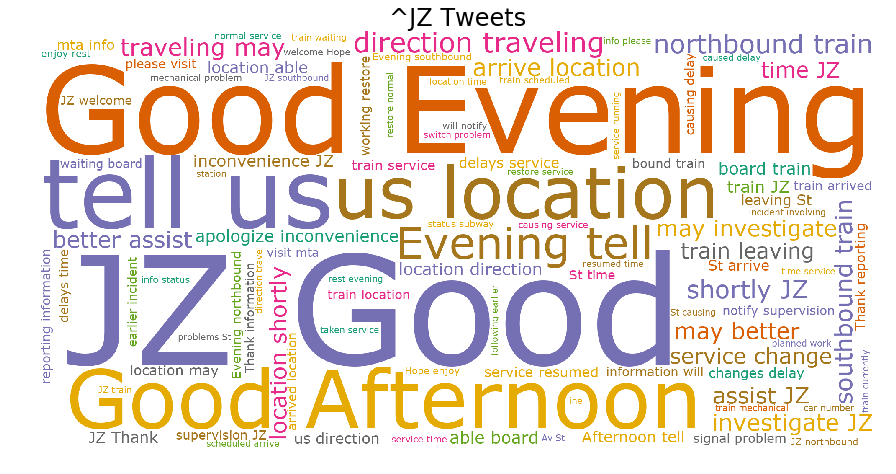

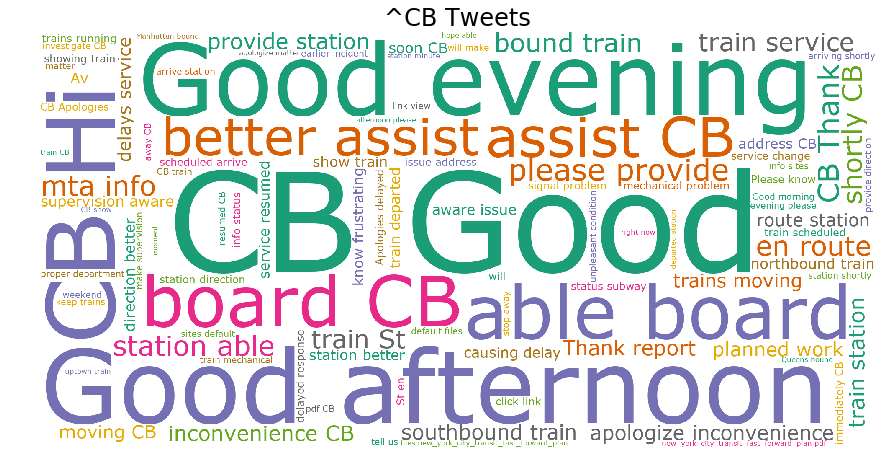

ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 1080x576 with 0 Axes>

In [108]:
sig_list = list(df['sig'].unique())

for poop in sig_list:
    plt.figure(figsize=(15,8))
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      max_words=(100),
                      width=2000, height=1000,
                      relative_scaling = 0.5,
                      background_color='white',
                      colormap='Dark2'
                  
    ).generate(' '.join(df[df['sig']==poop].text))
    plt.imshow(wordcloud)
    plt.title("{} Tweets".format(poop), fontsize=24)
    plt.axis("off")
    plt.show()